# Tutorial on class AnalyticalTomography

In [1]:
import sys
sys.path.append("/home/martin/Work/Qutip/modules/")
import math
import numpy as np
import Tomomod as Tm
import Utility as Ut
from qutip import basis

Here we demonstrate 2 level basis tomogrophy sceme. It is analytical ly soluble, as demonstrated in...

We start by defining some parameters and the object, $T2D$, which is an instance of the class AnalyticalTomography.
If we do not specify an initial state, it will be assumed that the ground state applies.

## Initial considerations

In [2]:
P = 1.
B = 1.
T2D = Tm.AnalyticalTomography(P, B)

The quantity $P^*$ is the pulse strength that is required to bring the projection of $\sigma_3$ on itself to zero after backwards propagation in the impact approximation. It is accessable via AnalyticalTomogrophy as

In [3]:
print(T2D.Pstar, T2D.DOstar*180./math.pi)

2.6726819190994378 -95.85670190991829


Let's plot the projections of the Operator $ \mathbf{O} = \frac{1}{2} \left(\sigma_0 + \sigma_3\right)$ matrices on the four Pauli matrices after backwards propagation in the impact approximation under the influence of a pulse with pulse strength $P$. The operator, $\mathbf{O}$, measures the ground state population of the given state.

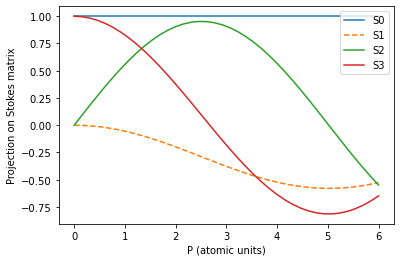

In [28]:
Ps = np.linspace(0., 6., 40)
T2D.plot_StokesP(Ps)

We see that the projections on $\sigma_0$ and $\sigma_3$ are both initially $1$, as expected. The projection on $\sigma_0$ stays one, since we are using a 2-level basis, so the total population on the first two states remains $1$. The projection on $\sigma_3$, however, is reducedby the interaction of the field. It reaches the value $0$ close to $P=2.7$, which is consistent with the value for $P^*$ that we have seen.

Next we print the projections on the Pauli matrices $\sigma_i, \quad i = 1,2,3$ at $P^*$

In [29]:
print("i=1:",Tm.Stokesi(1, T2D.Pstar), "i=2:", Tm.Stokesi(2,T2D.Pstar), "i=3:", Tm.Stokesi(3,T2D.Pstar))

i=1: -0.31943828249997 i=2: 0.947607082958686 i=3: 6.641580227498368e-17


Note that the projection onto $\sigma_2$ is much larger than the projection onto $\sigma_1$.

## State tomography

We continue by considering a tomographic scheme, where we measure the final ground state population of the propagated initial state for three different sets of values $\{P, t\}$. The final ground state population is related to the final $S_3$-value by $S_3 = 2|c_0|^2-1$. 

In [9]:
print(T2D.istate)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]


In [10]:
for i in range(3):
    print(T2D.Us[i].full())

[[ 0.48224892+0.51714213j  0.48224892+0.51714213j]
 [-0.64409631+0.2917875j   0.64409631-0.2917875j ]]
[[ 0.48224892+0.51714213j  0.51714213-0.48224892j]
 [-0.64409631+0.2917875j  -0.2917875 -0.64409631j]]
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]


In [11]:
T2D.tomo_run()

In [12]:
T2D.print_iStokes()

Initial Stokes parameter 0 : 1.0
Initial Stokes parameter 1 : 0.0
Initial Stokes parameter 2 : 0.0
Initial Stokes parameter 3 : 1.0


In [13]:
T2D.print_Stokes()

Stokes parameter 0 : 1.0
Stokes parameter 1 : 6.661338147750939e-16
Stokes parameter 2 : 6.661338147750939e-16
Stokes parameter 3 : 1.0


In [23]:
T2D2 = Tm.AnalyticalTomography(P, B, istate=(basis(2,0) + 1.j*basis(2,1)).unit())
#T2D2 = Tm.AnalyticalTomography(P, B, istate=basis(2,1))

In [24]:
T2D2.tomo_run()

In [25]:
T2D2.print_iStokes()
T2D2.print_Stokes()

Initial Stokes parameter 0 : 0.9999999999999998
Initial Stokes parameter 1 : 0.0
Initial Stokes parameter 2 : 0.9999999999999998
Initial Stokes parameter 3 : 0.0
Stokes parameter 0 : 1.0
Stokes parameter 1 : -2.220446049250313e-16
Stokes parameter 2 : 0.9999999999999996
Stokes parameter 3 : -2.220446049250313e-16


In [26]:
T2D2.istate

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678+0.j        ]
 [0.        +0.70710678j]]

In [27]:
print(Ut.Proj(Tm.Pauli(1), T2D2.Us[0]))

(-0.16184738910068852+0.8089296261982993j)
